In [86]:
#@author-Tejasvi Sharma
#To gain insights from H1-B petition data set from kaggle.com
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [87]:
#loading data into a dataframe
df=pd.read_csv("h1b_kaggle.csv")

In [88]:
#basics about the data set
print(df.info())
#head of data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB
None


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [89]:
#checking whether first column is unique or not,if True it means it is unique, remaning it to Unique_Id.
print(df['Unnamed: 0'].nunique()==df.shape[0])
df.rename(columns={'Unnamed: 0':"Unique_Id"},inplace=True)

True


In [90]:
#removing null values, not many values are removed from the data set
df=df.dropna()
print(df.shape)

(2877765, 11)


In [91]:
# checking unique values in column CASE_STATUS
print(df['CASE_STATUS'].unique())

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']


In [92]:
#split Worksite to get State from worksite
df['State']=df['WORKSITE'].str.split(",").str[1]

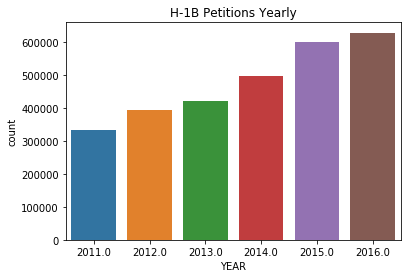

In [98]:
sns.countplot(df["YEAR"])
plt.title("H-1B Petitions Yearly")
plt.show()

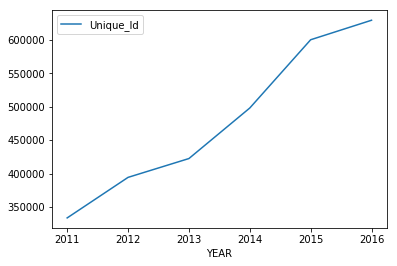

In [110]:
df[["YEAR","Unique_Id"]].groupby("YEAR").count().plot()
plt.show()